170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


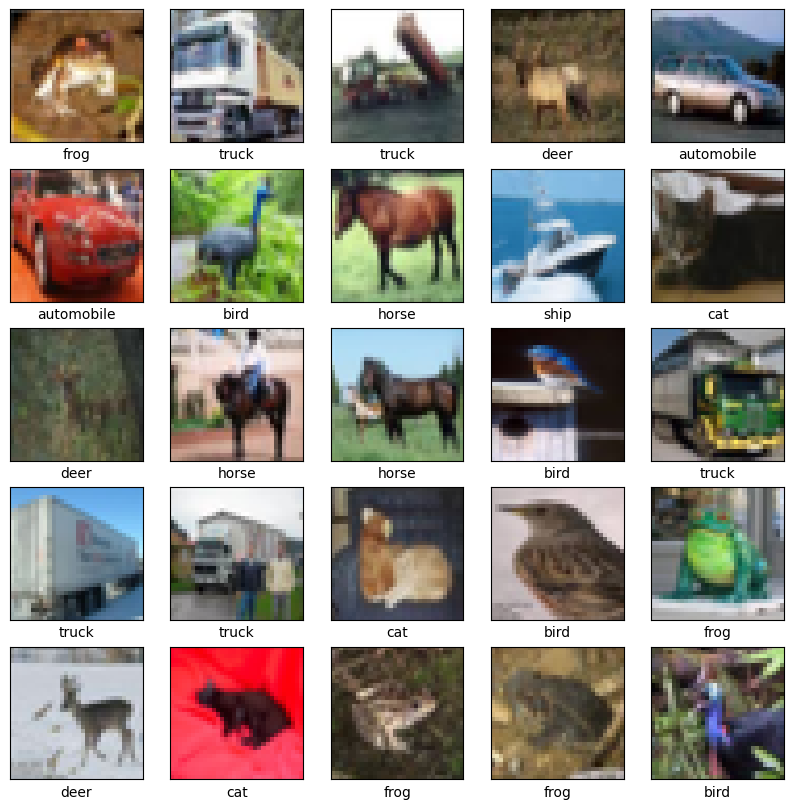

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3443 - loss: 1.7671 - val_accuracy: 0.5505 - val_loss: 1.2479
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.5610 - loss: 1.2311 - val_accuracy: 0.6086 - val_loss: 1.0888
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6288 - loss: 1.0495 - val_accuracy: 0.6378 - val_loss: 1.0156
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6704 - loss: 0.9417 - val_accuracy: 0.6454 - val_loss: 1.0007
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6917 - loss: 0.8791 - val_accuracy: 0.6600 - val_loss: 0.9709
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7173 - loss: 0.8011 - val_accuracy: 0.6909 - val_loss: 0.8957
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7372 - loss: 0.7450 - val_accuracy: 0.6886 - val_loss: 0.9205
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7523 -

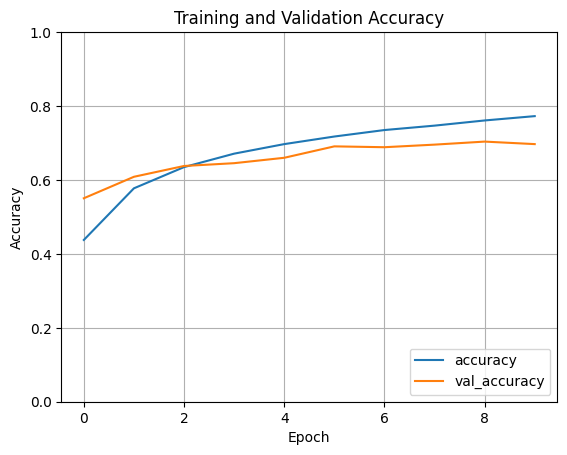

In [1]:
# 1. Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 2. Load and Preprocess the Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Visualize the Data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 4. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # No activation, logits output
])

# 5. Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 6. Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 7. Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# 8. Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.7648 - loss: 0.7526 - val_accuracy: 0.9782 - val_loss: 0.0844
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.9596 - loss: 0.1310 - val_accuracy: 0.9842 - val_loss: 0.0578
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9720 - loss: 0.0861 - val_accuracy: 0.9868 - val_loss: 0.0481
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9770 - loss: 0.0749 - val_accuracy: 0.9885 - val_loss: 0.0427
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9799 - loss: 0.0639 - val_accuracy: 0.9912 - val_loss: 0.0355
Test loss: 0.03636722266674042
Test accuracy: 0.988099992275238


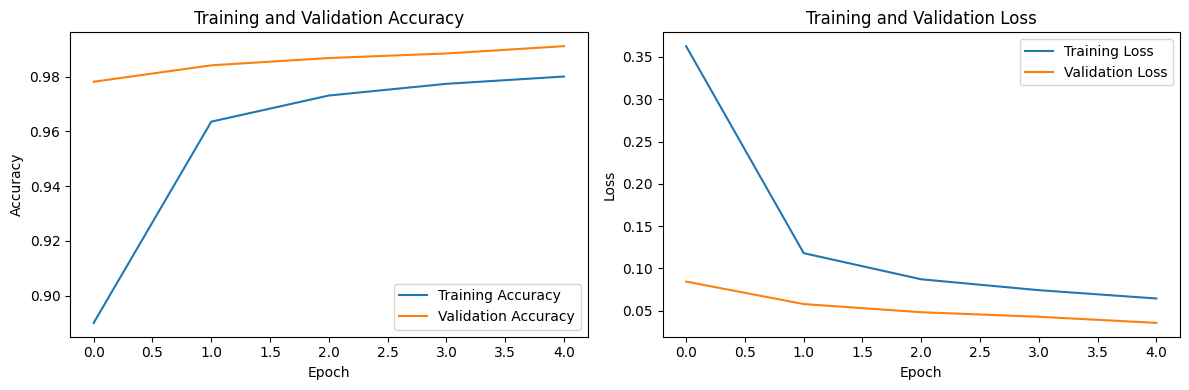

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


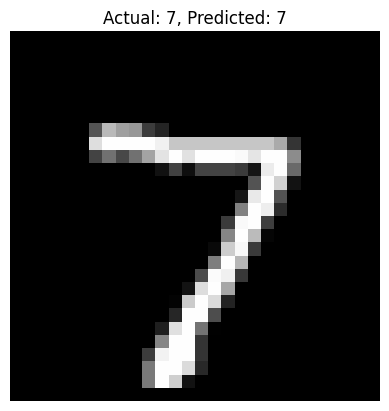

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and Preprocess the Data
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data to fit the model (add channel dimension for grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Step 3: Build the CNN Model
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Step 4: Compile the Model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Step 5: Train the Model
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# Step 6: Evaluate the Model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Step 7: Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Sample prediction
sample_idx = 0  # Change this to test different images
sample_image = x_test[sample_idx]
sample_label = np.argmax(y_test[sample_idx])

# Reshape for prediction (add batch dimension)
prediction = model.predict(np.expand_dims(sample_image, 0))
predicted_label = np.argmax(prediction)

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Actual: {sample_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train directory exists: True
Validation directory exists: True
Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.
Class names: ['cats', 'dogs']


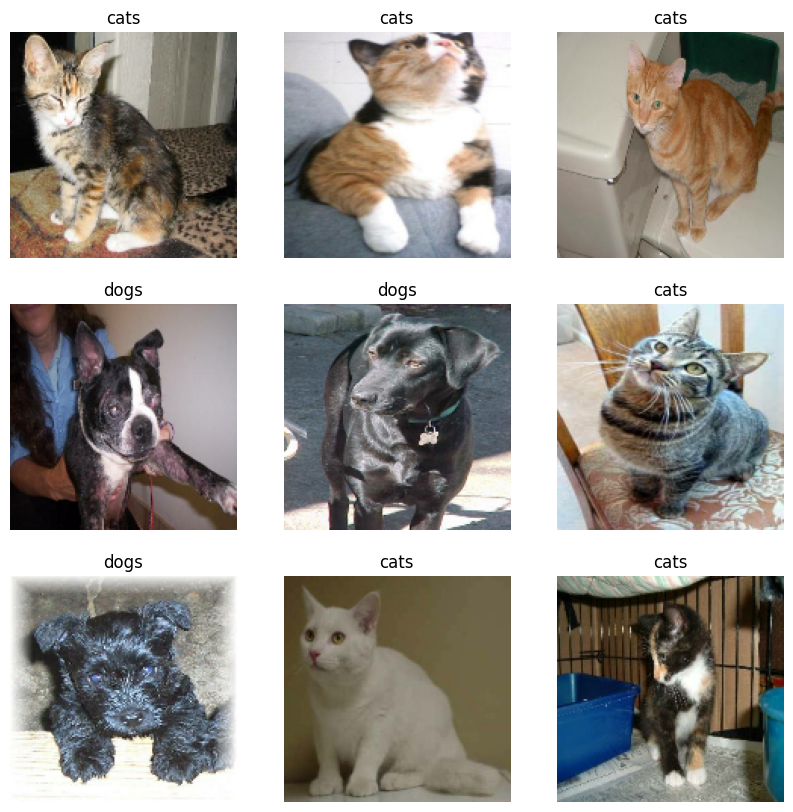

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 501s 10s/step - binary_accuracy: 0.8035 - loss: 9.4027 - val_binary_accuracy: 0.9525 - val_loss: 0.6622
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 502s 10s/step - binary_accuracy: 0.9380 - loss: 0.6610 - val_binary_accuracy: 0.9500 - val_loss: 0.3734
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 501s 10s/step - binary_accuracy: 0.9801 - loss: 0.1287 - val_binary_accuracy: 0.9525 - val_loss: 0.3730
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 445s 9s/step - binary_accuracy: 0.9777 - loss: 0.1492 - val_binary_accuracy: 0.9450 - val_loss: 0.3311
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 502s 9s/step - binary_accuracy: 0.9891 - loss: 0.0782 - val_binary_accuracy: 0.9575 - val_loss: 0.2403
Epoch 5/10
33/50 ━━━━━━━━━━━━━━━━━━━━ 2:23 8s/step - binary_accuracy: 0.9863 - loss: 0.1009

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

# Step 1: Download and extract dataset manually
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

extract_path = '/tmp/cats_and_dogs_filtered'
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/tmp')

train_dir = os.path.join(extract_path, 'train')
validation_dir = os.path.join(extract_path, 'validation')

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))

# Step 2: Parameters
batch_size = 32
img_height = 150
img_width = 150

# Step 3: Load datasets
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = keras.utils.image_dataset_from_directory(
    train_dir,  # NOTE: use train_dir again, with validation_split and subset="validation"
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class names:", class_names)

# Step 4: Optimize dataset loading
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Step 5: Visualize sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Step 6: Build the model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Step 7: Train the model
initial_epochs = 5
history = model.fit(
    train_ds,
    epochs=initial_epochs,
    validation_data=val_ds
)

# Step 8: Fine-tune the model
base_model.trainable = True
fine_tune_at = 15

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=val_ds
)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {accuracy*100:.2f}%")

# Step 10: Plot training history
acc = history.history['binary_accuracy'] + history_fine.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] + history_fine.history['val_binary_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(len(history.history['binary_accuracy'])-1, linestyle='--', color='gray')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(len(history.history['loss'])-1, linestyle='--', color='gray')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Step 11: Sample prediction visualization
for images, labels in val_ds.take(1):
    sample_image = images[0]
    sample_label = labels[0].numpy()

prediction = model.predict(np.expand_dims(sample_image, 0))
predicted_label = 1 if prediction[0][0] > 0.5 else 0

plt.imshow(sample_image.numpy().astype("uint8"))
plt.title(f"Actual: {class_names[sample_label]}, Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()